/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
420/420 - 2s - 4ms/step - accuracy: 0.1103 - loss: 0.0919 - val_accuracy: 0.1298 - val_loss: 0.0906
Epoch 2/50
420/420 - 1s - 3ms/step - accuracy: 0.1277 - loss: 0.0902 - val_accuracy: 0.1461 - val_loss: 0.0899
Epoch 3/50
420/420 - 1s - 3ms/step - accuracy: 0.1875 - loss: 0.0897 - val_accuracy: 0.1923 - val_loss: 0.0896
Epoch 4/50
420/420 - 2s - 4ms/step - accuracy: 0.1604 - loss: 0.0895 - val_accuracy: 0.1531 - val_loss: 0.0895
Epoch 5/50
420/420 - 2s - 5ms/step - accuracy: 0.1565 - loss: 0.0894 - val_accuracy: 0.1492 - val_loss: 0.0893
Epoch 6/50
420/420 - 1s - 3ms/step - accuracy: 0.1646 - loss: 0.0893 - val_accuracy: 0.1548 - val_loss: 0.0892
Epoch 7/50
420/420 - 1s - 3ms/step - accuracy: 0.1769 - loss: 0.0891 - val_accuracy: 0.1666 - val_loss: 0.0890
Epoch 8/50
420/420 - 3s - 8ms/step - accuracy: 0.1915 - loss: 0.0890 - val_accuracy: 0.1789 - val_loss: 0.0889
Epoch 9/50
420/420 - 1s - 3ms/step - accuracy: 0.1961 - loss: 0.0888 - val_accuracy: 0.2141 - val_loss: 0.0887
E

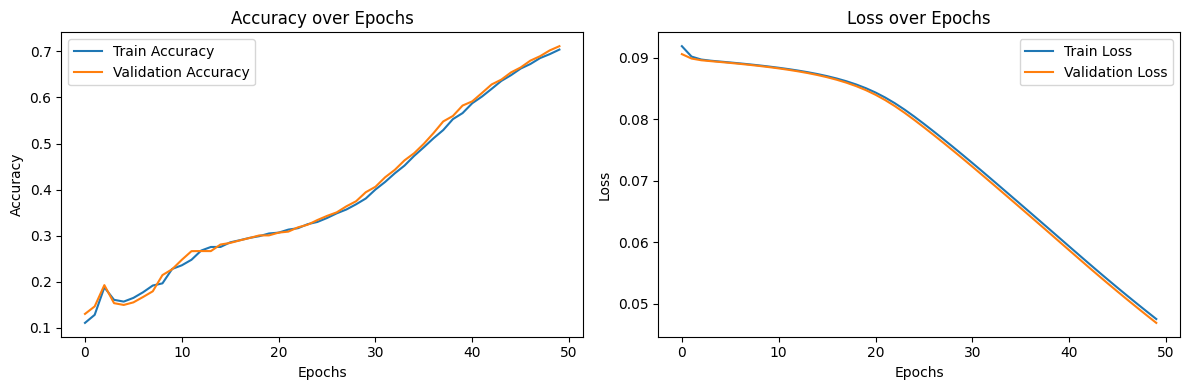

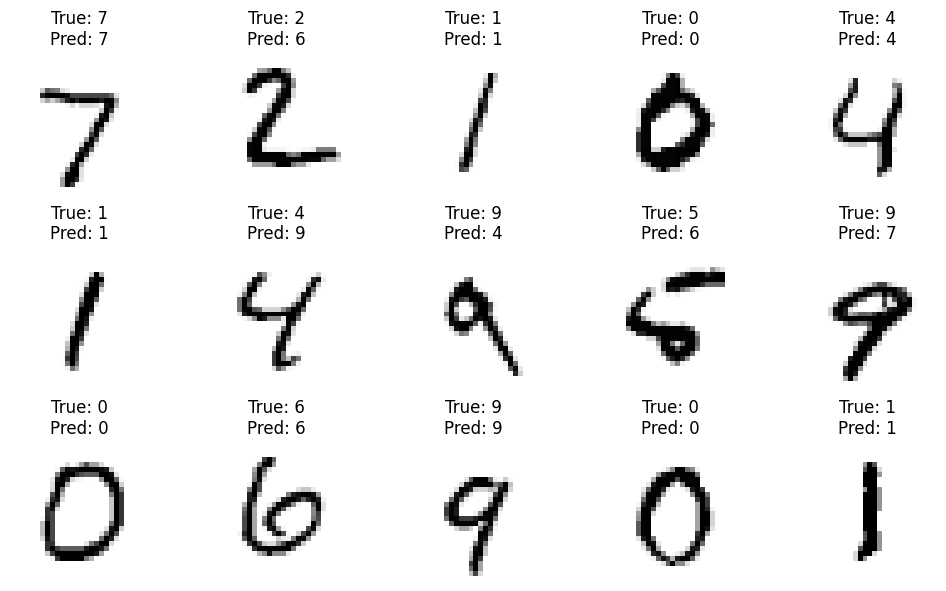

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load MNIST dataset
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data
X = X.reshape(-1, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255

# Split training data into train (70%) and validation (30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_valid_onehot = tf.keras.utils.to_categorical(y_valid, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# Build a fully connected ANN model
def create_ann_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
        tf.keras.layers.Dense(50, activation='sigmoid'),  # Hidden layer 1
        tf.keras.layers.Dense(50, activation='sigmoid'),  # Hidden layer 2
        tf.keras.layers.Dense(10, activation='softmax')   # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    return model

# Initialize and train the model
model = create_ann_model()

history = model.fit(
    X_train, y_train_onehot,
    validation_data=(X_valid, y_valid_onehot),
    epochs=50,
    batch_size=100,
    verbose=2
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Compute macro AUC
y_test_pred = model.predict(X_test)
y_test_binarized = label_binarize(y_test, classes=range(10))
macro_auc = roc_auc_score(y_test_binarized, y_test_pred, average='macro', multi_class='ovr')
print(f"Macro AUC: {macro_auc:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize predictions and true values
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test[i].reshape(28, 28)
    true_label = y_test[i]
    predicted_label = np.argmax(y_test_pred[i])
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'True: {true_label}\nPred: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()
